## Load Dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning and Encode

In [8]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value 


s=df.shape#s0 is num of appicants s1 is features
#washing strings
for i in range(s[0]):
    if df['Dependents'][i]=='3+':
        df['Dependents'][i]='3'#这里用replace会报错？
df['Dependents']=pd.to_numeric( df['Dependents'], errors='coerce').astype('float64')#先把NAN全部改成-1
df['Gender']=df['Gender'].str.replace('Male','1')
df['Gender']=df['Gender'].str.replace('Female','0')
df['Gender']=pd.to_numeric( df['Gender'], errors='coerce').astype('float64')#先把NAN全部改成-1
df['Married']=df['Married'].str.replace('Yes','1')
df['Married']=df['Married'].str.replace('No','0')
df['Married']=pd.to_numeric( df['Married'], errors='coerce').astype('float64')#先把NAN全部改成-1
df['Education']=df['Education'].str.replace('Not Graduate','0')
df['Education']=df['Education'].str.replace('Graduate','1')
#注意这里not edu 不能在edu后面

df['Education']=pd.to_numeric( df['Education'], errors='coerce').astype('float64')#先把NAN全部改成-1

df['Self_Employed']=df['Self_Employed'].str.replace('Yes','1')
df['Self_Employed']=df['Self_Employed'].str.replace('No','0')
df['Self_Employed']=pd.to_numeric( df['Self_Employed'], errors='coerce').astype('float64')#先把NAN全部改成-1

df['Property_Area']=df['Property_Area'].str.replace('Urban','2')
df['Property_Area']=df['Property_Area'].str.replace('Semiurban','1')
df['Property_Area']=df['Property_Area'].str.replace('Rural','0')
df['Property_Area']=pd.to_numeric( df['Property_Area'], errors='coerce').astype('float64')#先把NAN全部改成-1
df['Loan_Status']=df['Loan_Status'].str.replace('Y','1')
df['Loan_Status']=df['Loan_Status'].str.replace('N','0')
df['Loan_Status']=pd.to_numeric( df['Self_Employed'], errors='coerce').astype('float64')#先把NAN全部改成-1
#washing strings

#washing  floats/ints
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)
#washing 
df=df.sample(frac=1)


C:\Users\tooll\AppData\Local\Temp\ipykernel_12196\2268856412.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents'][i]='3'#这里用replace会报错？


In [10]:
# Task2 deal with categorical features
# Tip df.Gender=df.Gender.map({'Male':1,'Female':0})
#print(df['Education'][:20])
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data process(包括增加特征和正则化)

In [11]:
df=df.sample(frac=1)

df_norms=df.drop(columns=['Loan_Status'])
for column in df_norms:
    #print(df_norm[column])
    mean_val=df_norms[column].mean()
    var_1=df_norms[column].var()
    df_norms[column]=(df_norms[column]-mean_val)/var_1
list=[1 for _ in range(614)]
data=pd.DataFrame(list,columns=['intercept'])
df_norms=pd.concat([df_norms,data],axis=1)
for i in range(614):
    list[i]=np.exp(df_norms['ApplicantIncome'][i])
data=pd.DataFrame(list,columns=['ApplicantIncome^2'])
df_norms=pd.concat([df_norms,data],axis=1)
#13
#from now the df_norms has become a normalized dataframe with intercept,we want to do
#ten times tem fold
#print(df_norms)
#split
X_train=df.iloc[:554]
#y_train=df.iloc[10]
X_test=df.iloc[554:]
#y_test=df.iloc[10][554:]
y_train=X_train['Loan_Status']
y_test=X_test['Loan_Status']
X_train=df_norms.iloc[:554]
X_test=df_norms.iloc[554:]
#print(X_train)#先用直接抽取后60个的方式来测试，后面再更改随机抽取；十折等等

In [12]:
cols=np.linspace(0,12,endpoint=True,num=13,dtype=int)
X_train.columns=cols
X_test.columns=cols
rows=np.linspace(0,59,endpoint=True,num=60,dtype=int)
X_test.index=rows
y_test.index=rows

In [13]:
#print(X_test.shape)
a=np.zeros(0)

## Train

In [14]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt
obj=LogisticRegression()
theta_0= np.random.rand(13)
J_his=np.zeros(0)

theta_0,J_his=obj.fit(X_train.T,y_train)
#print(J_his)
# Task4 train your model and plot the loss curve of training

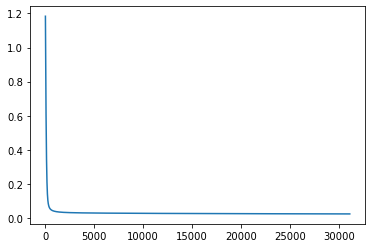

In [15]:
a=np.linspace(0,len(J_his)-1,endpoint=True,num=len(J_his))
plt.plot(a,J_his)

## Test

In [16]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
print("without restriction and with normalzation,iteration=1e4 (baseline) is",obj.predict(X_test.T,y_test,theta_0))

without restriction and with normalzation,iteration=1e4 (baseline) is 0.9333333333333333


with lambda=2 and with normalzation,iteration=1e4 is 0.9333333333333333


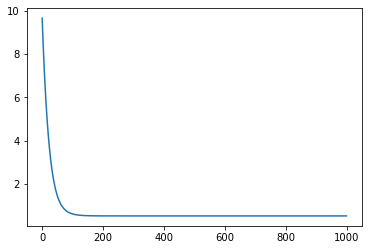

In [17]:
theta_1= np.random.rand(13)
J_his1=np.zeros(0)
theta_1,J_his1=obj.fit(X_train.T,y_train,lambda_=2)
a=np.linspace(0,len(J_his1)-1,endpoint=True,num=len(J_his1))
plt.plot(a,J_his1)
print("with lambda=2 and with normalzation,iteration=1e4 is",obj.predict(X_test.T,y_test,theta_1))

lambda= 0 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lambda= 1 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lambda= 3 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lambda= 10 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lambda= 30 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lambda= 0.1 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lambda= 0.3 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lr= 0.001 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lr= 0.003 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lr= 0.01 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lr= 0.03 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lr= 0.1 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8
lr= 0.3 accuracy= 0.9333333333333333 recall= 1.0 precision= 0.8


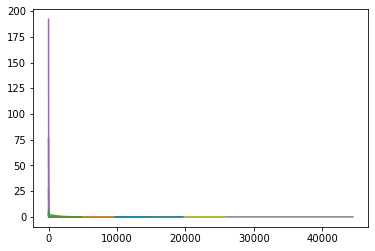

In [18]:

#改变参数
for i in [0,1,3,10,30,0.1,0.3]:
    theta,J_his0=obj.fit(X_train.T,y_train,lambda_=i,max_iter=3e3)
    a=np.linspace(0,len(J_his0)-1,endpoint=True,num=len(J_his0))
    plt.plot(a,J_his0)
    b=obj.predict(X_test.T,y_test,theta)
    pr,rc=obj.re_pr(X_test.T,y_test,theta)
    print("lambda=",i,"accuracy=",b,"recall=",rc,"precision=",pr)

for i in [0.001,0.003,0.01,0.03,0.1,0.3]:
    theta,J_his0=obj.fit(X_train.T,y_train,lr=i)
    a=np.linspace(0,len(J_his0)-1,endpoint=True,num=len(J_his0))
    plt.plot(a,J_his0)
    b=obj.predict(X_test.T,y_test,theta)
    pr,rc=obj.re_pr(X_test.T,y_test,theta)
    print("lr=",i,"accuracy=",b,"recall=",rc,"precision=",pr)

In [19]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
print(obj.predict(X_test.T,y_test,theta_0))
#print(X_test.shape,df_norms.shape)

0.9333333333333333


D:\2022autumn\机器学习概论\ml_2022_f-master\lab\lab1\Logistic.py:22: RuntimeWarning: divide by zero encountered in log
  J+=-np.dot(y,np.log(self.sigmoid(np.dot(X.T,theta))))/m-np.dot(1-y,np.log(1-self.sigmoid(np.dot(X.T,theta))))/m
D:\2022autumn\机器学习概论\ml_2022_f-master\lab\lab1\Logistic.py:39: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J-J_his[i-1])<tol )&(i>=1000):


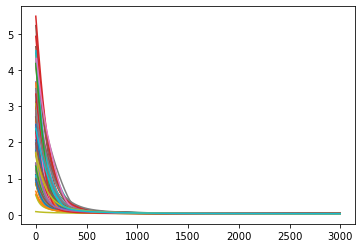

In [20]:
#实现十次十折
#beforehand we have already make the dataframe random and we need to split it
res=np.zeros((10,3))#0is acc,1 is pr,1 is rc,store the result of one time of ten fold
rres=np.zeros((10,3))
#614
for j in range(10):
    df=df.sample(frac=1)
    df_norms=df.drop(columns=['Loan_Status'])
    for column in df_norms:
        #print(df_norms[column])
        mean_val=df_norms[column].mean()
        var_1=df_norms[column].var()
        df_norms[column]=(df_norms[column]-mean_val)/var_1
    list=[1 for _ in range(614)]
    data=pd.DataFrame(list,columns=['intercept'])
    df_norms=pd.concat([df_norms,data],axis=1)
    for i in range(614):
        list[i]=np.exp(df_norms['ApplicantIncome'][i])
    data=pd.DataFrame(list,columns=['ApplicantIncome^2'])
    df_norms=pd.concat([df_norms,data],axis=1)
    for i in range(10):
        X_temp_test=df.iloc[i*61:(i+1)*61]
        X_temp_train=pd.concat([df.iloc[0:i*61],df.iloc[(i+1)*61:]],axis=0)
        y_temp_test=X_temp_test['Loan_Status']
        y_temp_train=X_temp_train['Loan_Status']
        X_temp_test=df_norms.iloc[i*61:(i+1)*61]
        X_temp_train=pd.concat([df_norms.iloc[0:i*61],df_norms.iloc[(i+1)*61:]],axis=0)
        cols=np.linspace(0,12,endpoint=True,num=13,dtype=int)
        X_temp_train.columns=cols
        X_temp_test.columns=cols
        rows=np.linspace(0,60,endpoint=True,num=61,dtype=int)
        X_temp_test.index=rows
        y_temp_test.index=rows
        rows1=np.linspace(0,552,endpoint=True,num=553,dtype=int)
        X_temp_train.index=rows1
        y_temp_train.index=rows1
        theta_10= np.random.rand(13)
        J_his10=np.zeros(0)
        theta_10,J_his10=obj.fit(X_temp_train.T,y_temp_train,lambda_=0,max_iter=3e3)
        a=np.linspace(0,len(J_his10)-1,endpoint=True,num=len(J_his10))
        plt.plot(a,J_his10)
        res[i][0]=obj.predict(X_temp_test.T,y_temp_test,theta_10)
        res[i][1],res[i][2]=obj.re_pr(X_temp_test.T,y_temp_test,theta_10)#1pr,2re
    rres[j]=res.mean(axis=0)


# df_norms=df.drop(columns=['Loan_Status'])
# for column in df_norms:
#     #print(df_norm[column])
#     mean_val=df_norms[column].mean()
#     var_1=df_norms[column].var()
#     df_norms[column]=(df_norms[column]-mean_val)/var_1
# list=[1 for _ in range(614)]
# data=pd.DataFrame(list,columns=['intercept'])
# df_norms=pd.concat([df_norms,data],axis=1)
# #from now the df_norms has become a normalized dataframe with intercept,we want to do
# #ten times tem fold
# #print(df_norms)
# #split
# X_train=df.iloc[:554]
# #y_train=df.iloc[10]
# X_test=df.iloc[554:]
# #y_test=df.iloc[10][554:]
# y_train=X_train['Loan_Status']
# y_test=X_test['Loan_Status']
# X_train=df_norms.iloc[:554]
# X_test=df_norms.iloc[554:]

In [21]:
F1=np.zeros(10)
for i in range(10):
    print("id=",i,"acc=",rres[i][0],"pr=",rres[i][1],"re=",rres[i][2],"F1=",2*rres[i][1]*rres[i][2]/(rres[i][1]+rres[i][2]))
    F1[i]=2*rres[i][1]*rres[i][2]/(rres[i][1]+rres[i][2])
print('acc_ave,pr_ave,re_ave分别为',res.mean(axis=0),'F1_ave为',F1.mean())

id= 0 acc= 0.9475409836065575 pr= 0.7167316017316017 re= 1.0 F1= 0.83499552406289
id= 1 acc= 0.9475409836065575 pr= 0.7187445887445888 re= 1.0 F1= 0.8363599727980254
id= 2 acc= 0.9475409836065574 pr= 0.7169774669774669 re= 1.0 F1= 0.8351623486819776
id= 3 acc= 0.9491803278688525 pr= 0.7123588911088911 re= 1.0 F1= 0.8320205475705866
id= 4 acc= 0.9491803278688525 pr= 0.7187649605296664 re= 1.0 F1= 0.8363737649249806
id= 5 acc= 0.9475409836065574 pr= 0.7076228673287497 re= 1.0 F1= 0.8287812032356895
id= 6 acc= 0.9475409836065574 pr= 0.7211904761904762 re= 1.0 F1= 0.8380135565085074
id= 7 acc= 0.9491803278688525 pr= 0.720875350140056 re= 1.0 F1= 0.837800773985619
id= 8 acc= 0.9475409836065575 pr= 0.7164213564213564 re= 1.0 F1= 0.8347849480445236
id= 9 acc= 0.9475409836065574 pr= 0.7132217782217782 re= 1.0 F1= 0.8326088160775773
acc_ave,pr_ave,re_ave分别为 [0.94754098 0.71322178 1.        ] F1_ave为 0.8346901455890376
